In [16]:
import pandas as pd

In [17]:
climate_change = pd.read_csv('./dataset/climate_change.csv', index_col=0, parse_dates=True)
climate_change

,co2,relative_temp
date,,
1958-03-06,315.71,0.10
1958-04-06,317.45,0.01
1958-05-06,317.50,0.08
1958-06-06,NaN,-0.05
1958-07-06,315.86,0.06
...,...,...
2016-08-06,402.27,0.98
2016-09-06,401.05,0.87
2016-10-06,401.59,0.89


In [18]:
climate_change.index

DatetimeIndex(['1958-03-06', '1958-04-06', '1958-05-06', '1958-06-06',
               '1958-07-06', '1958-08-06', '1958-09-06', '1958-10-06',
               '1958-11-06', '1958-12-06',
               ...
               '2016-03-06', '2016-04-06', '2016-05-06', '2016-06-06',
               '2016-07-06', '2016-08-06', '2016-09-06', '2016-10-06',
               '2016-11-06', '2016-12-06'],
              dtype='datetime64[ns]', name='date', length=706, freq=None)

In [19]:
climate_change.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 706 entries, 1958-03-06 to 2016-12-06
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   co2            699 non-null    float64
 1   relative_temp  706 non-null    float64
dtypes: float64(2)
memory usage: 16.5 KB


## Plotting  time-series data

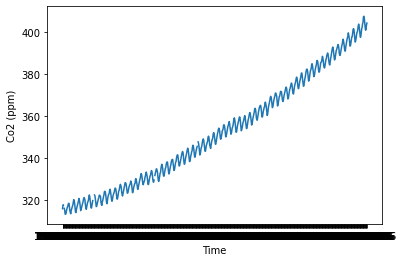

In [5]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots()
ax.plot(climate_change.index, climate_change['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('Co2 (ppm)')
# ax.set_xticks([1960, 1970, 1980, 1990, 2000, 2010])
plt.show()

## zooming into a decade

In [6]:
sixties = climate_change['1960-01-01':'1969-12-31']
sixties

,co2,relative_temp
date,,
1960-01-06,316.43,-0.01
1960-02-06,316.97,0.14
1960-03-06,317.58,-0.36
1960-04-06,319.02,-0.16
1960-05-06,320.03,-0.08
...,...,...
1969-08-06,323.67,0.03
1969-09-06,322.38,0.10
1969-10-06,321.78,0.11


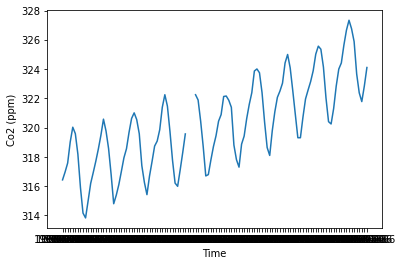

In [7]:
fig , ax = plt.subplots()
ax.plot(sixties.index, sixties['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('Co2 (ppm)')
plt.show()

### Zooming in on one year

In [8]:
sixty_nine = climate_change['1969-01-01':'1969-12-31']
sixty_nine

,co2,relative_temp
date,,
1969-01-06,324.00,-0.11
1969-02-06,324.42,-0.14
1969-03-06,325.64,0.00
1969-04-06,326.66,0.19
1969-05-06,327.34,0.20
1969-06-06,326.76,0.05
1969-07-06,325.88,-0.01
1969-08-06,323.67,0.03
1969-09-06,322.38,0.10


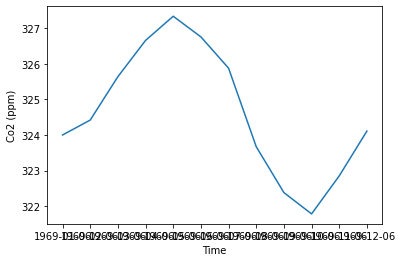

In [9]:
fig , ax = plt.subplots()
ax.plot(sixty_nine.index, sixty_nine['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('Co2 (ppm)')
plt.show()

## Plotting time-series with different variables

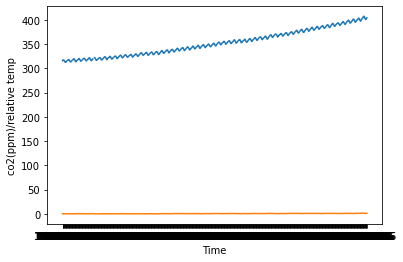

In [10]:
fig, ax = plt.subplots()
ax.plot(climate_change.index, climate_change['co2'])
ax.plot(climate_change.index, climate_change['relative_temp'])
ax.set_xlabel('Time')
ax.set_ylabel('co2(ppm)/relative temp')
plt.show()

### Using twin axes

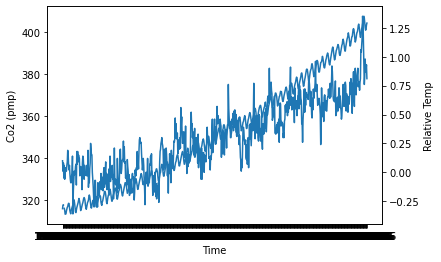

In [11]:
fig, ax = plt.subplots()
ax.plot(climate_change.index, climate_change['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('Co2 (pmp)')
ax2 = ax.twinx()
ax2.plot(climate_change.index, climate_change['relative_temp'])
ax2.set_ylabel('Relative Temp')
plt.show()

### Separating variables by color

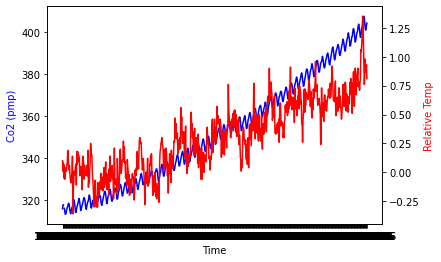

In [12]:
fig, ax = plt.subplots()
ax.plot(climate_change.index, climate_change['co2'], color='b')
ax.set_xlabel('Time')
ax.set_ylabel('Co2 (pmp)', color='b')
ax2 = ax.twinx()
ax2.plot(climate_change.index, climate_change['relative_temp'], color='r')
ax2.set_ylabel('Relative Temp', color='r')
plt.show()

### Coloring the ticks

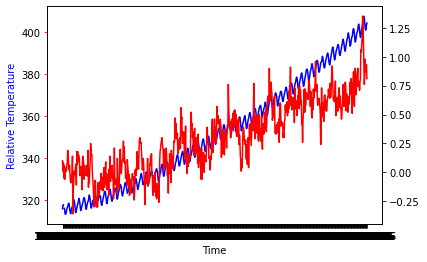

In [16]:
fig, ax = plt.subplots()
ax.plot(climate_change.index, climate_change['co2'], color='b')
ax.set_xlabel('Time')
ax.set_ylabel('Co2(pmp)', color='b')
ax.tick_params('y', color='b')

ax2 = ax.twinx()
ax2.plot(climate_change.index, climate_change['relative_temp'], color='r')
ax.set_ylabel('Relative Temperature')
ax.tick_params('y', color='r')

plt.show()

##### A function that plots time-series

In [23]:
def plotting_timeseries(axes, x, y, color , xlabel, ylabel):
    axes.plot(x, y, color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, color = color)
    axes.tick_params('y', colors=color)

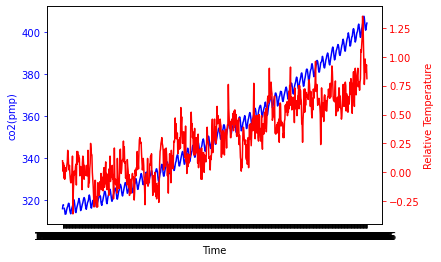

In [24]:
fig, ax = plt.subplots()

plotting_timeseries(ax, climate_change.index, climate_change['co2'], 'blue', 'Time', 'co2(pmp)')
ax2 = ax.twinx()
plotting_timeseries(ax2, climate_change.index, climate_change['relative_temp'], 'red', 'Time', 'Relative Temperature')

plt.show()

### Annotating time-series data

##### using annotate command

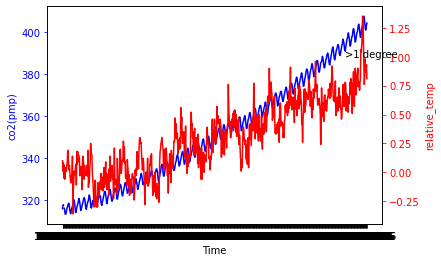

In [31]:
fig, ax = plt.subplots()

plotting_timeseries(ax, climate_change.index, climate_change['co2'], 'blue', 'Time', 'co2(pmp)')
ax2 = ax.twinx()
plotting_timeseries(ax2, climate_change.index, climate_change['relative_temp'], 'red', 'Time', 'relative_temp')
ax2.annotate('>1 degree', xy= ['2012-10-06', 1]) #xy is used to locate the point of annotation

plt.show()

##### Positioning the text

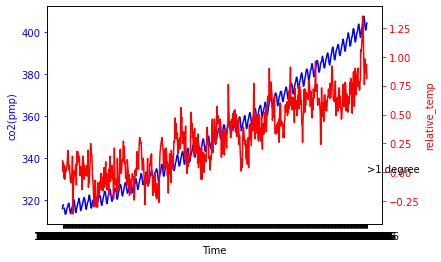

In [33]:
fig, ax = plt.subplots()

plotting_timeseries(ax, climate_change.index, climate_change['co2'], 'blue', 'Time', 'co2(pmp)')
ax2 = ax.twinx()
plotting_timeseries(ax2, climate_change.index, climate_change['relative_temp'], 'red', 'Time', 'relative_temp')
ax2.annotate('>1 degree', xy= ['2012-10-06', 1], xytext = ['2012=10-06', 0.00]) #xytext is used to positioning the text

plt.show()

##### Adding arrows to annotation

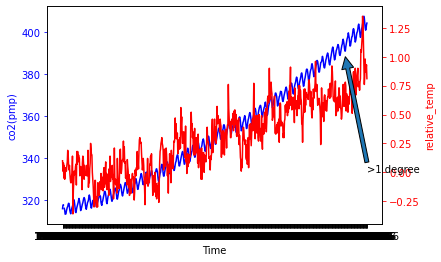

In [34]:
fig, ax = plt.subplots()

plotting_timeseries(ax, climate_change.index, climate_change['co2'], 'blue', 'Time', 'co2(pmp)')
ax2 = ax.twinx()
plotting_timeseries(ax2, climate_change.index, climate_change['relative_temp'], 'red', 'Time', 'relative_temp')
ax2.annotate('>1 degree', xy= ['2012-10-06', 1], xytext = ['2012=10-06', 0.00], arrowprops={}) #arrowprops is used to incdicate the text for specific point

plt.show()

##### Customizing arrow properties

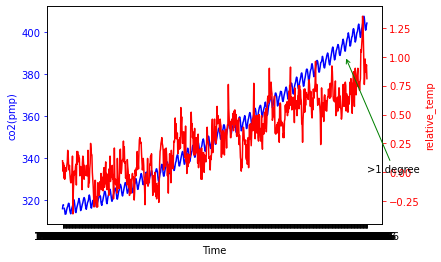

In [35]:
fig, ax = plt.subplots()

plotting_timeseries(ax, climate_change.index, climate_change['co2'], 'blue', 'Time', 'co2(pmp)')
ax2 = ax.twinx()
plotting_timeseries(ax2, climate_change.index, climate_change['relative_temp'], 'red', 'Time', 'relative_temp')
ax2.annotate('>1 degree',
             xy= ['2012-10-06', 1],
             xytext = ['2012=10-06', 0.00],
             arrowprops={'arrowstyle': '->', 'color' : 'green'}) #customizing the arrowprops

plt.show()

## Practise

### Read data with a time index

In [21]:
# Import pandas as pd
import pandas as pd

# Read the data from file using read_csv
climate_change = pd.read_csv('./dataset/climate_change.csv', index_col=0, parse_dates= True)

In [23]:
climate_change.index

DatetimeIndex(['1958-03-06', '1958-04-06', '1958-05-06', '1958-06-06',
               '1958-07-06', '1958-08-06', '1958-09-06', '1958-10-06',
               '1958-11-06', '1958-12-06',
               ...
               '2016-03-06', '2016-04-06', '2016-05-06', '2016-06-06',
               '2016-07-06', '2016-08-06', '2016-09-06', '2016-10-06',
               '2016-11-06', '2016-12-06'],
              dtype='datetime64[ns]', name='date', length=706, freq=None)

In [22]:
climate_change.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 706 entries, 1958-03-06 to 2016-12-06
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   co2            699 non-null    float64
 1   relative_temp  706 non-null    float64
dtypes: float64(2)
memory usage: 16.5 KB


### Plot time-series data

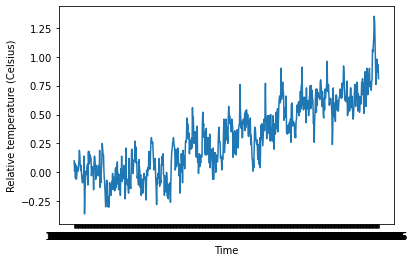

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# Add the time-series for "relative_temp" to the plot
ax.plot(climate_change.index, climate_change['relative_temp'])

# Set the x-axis label
ax.set_xlabel('Time')

# Set the y-axis label
ax.set_ylabel('Relative temperature (Celsius)')

# Show the figure
plt.show()

### Using a time index to zoom in

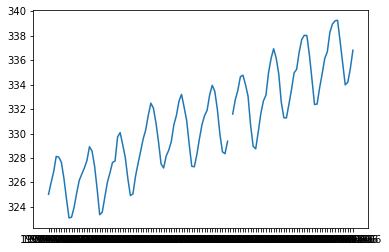

In [7]:
import matplotlib.pyplot as plt

# Use plt.subplots to create fig and ax
fig, ax = plt.subplots()

# Create variable seventies with data from "1970-01-01" to "1979-12-31"
seventies = climate_change['1970-01-01':'1979-12-31']

# Add the time-series for "co2" data from seventies to the plot
ax.plot(seventies.index, seventies["co2"])

# Show the figure
plt.show()

### Plotting two variables

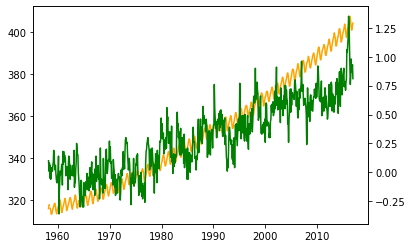

In [24]:
import matplotlib.pyplot as plt

# Initalize a Figure and Axes
fig, ax = plt.subplots()

# Plot the CO2 variable in blue
ax.plot(climate_change.index, climate_change['co2'], color='orange')

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature in red
ax2.plot(climate_change.index, climate_change['relative_temp'], color='green')

plt.show()

### Defining a function that plots time-series data

In [25]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)

### calling the function

In [ ]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change['co2'], "blue", 'Time (years)', "CO2 levels")

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], "red", 'Time (years)', "Relative temperature (Celsius)")

plt.show()

### Annotating a plot of time-series data

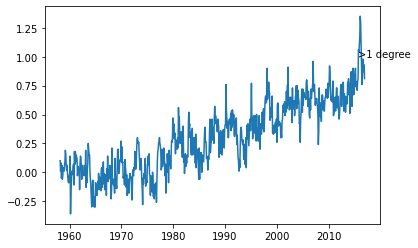

In [26]:
fig, ax = plt.subplots()

# Plot the relative temperature data
ax.plot(climate_change.index, climate_change['relative_temp'])

# Annotate the date at which temperatures exceeded 1 degree
ax.annotate(">1 degree", xy=[pd.Timestamp('2015-10-06'), 1])

plt.show()

### Plotting time-series: putting it all together

- Use the plot_timeseries function to plot CO2 levels against time. Set xlabel to "Time (years)" ylabel to "CO2 levels" and color to 'blue'.
- Create ax2, as a twin of the first Axes.
- In ax2, plot temperature against time, setting the color ylabel to "Relative temp (Celsius)" and color to 'red'.
- Annotate the data using the ax2.annotate method. Place the text ">1 degree" in x=pd.Timestamp('2008-10-06'), y=-0.2 pointing with a gray thin arrow to x=pd.Timestamp('2015-10-06'), y = 1.

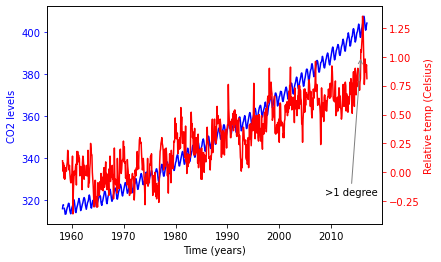

In [27]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change['co2'], 'blue', "Time (years)", "CO2 levels")

# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], 'red', "Time (years)", "Relative temp (Celsius)")

# Annotate point with relative temperature >1 degree
ax2.annotate(">1 degree",
            xy =[pd.Timestamp("2015-10-06"), 1],
            xytext=[pd.Timestamp('2008-10-06'), -0.2],
            arrowprops={ 'arrowstyle': '->',
                         'color':'gray'})

plt.show()